In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train_x = mnist.train.images
train_y = mnist.train.labels
val_x = mnist.validation.images
val_y = mnist.validation.labels
test_x = mnist.test.images
test_y = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


3

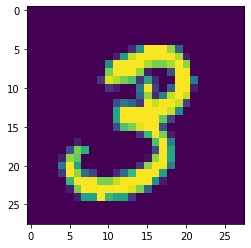

In [4]:
plt.imshow(train_x[1:2,:].reshape(28,28))
train_y[1:2,:]
np.argmax(train_y[1:2,:])

In [6]:
X = tf.placeholder(tf.float32, shape=[None, 784]) # train_x.shape
Y = tf.placeholder(tf.float32, shape=[None, 10]) # train_y.shape
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [7]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [8]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis),axis=1))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)

In [10]:
train = optimizer.minimize(cost)

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
epochs = range(1000)
for epoch in epochs:
    sess.run(train, feed_dict = {X:train_x, Y:train_y})

In [15]:
result = sess.run(hypothesis, feed_dict = {X:test_x})

In [16]:
result

array([[2.4851781e-08, 2.4088925e-15, 9.7182635e-12, ..., 9.9999762e-01,
        3.6089380e-09, 1.0355388e-06],
       [1.6117271e-08, 4.0748993e-12, 9.9997544e-01, ..., 1.0241217e-17,
        2.4544600e-09, 2.1748840e-16],
       [3.7429326e-09, 9.9650443e-01, 2.8342480e-04, ..., 1.1186366e-05,
        3.2913993e-04, 3.5560268e-05],
       ...,
       [2.9884782e-11, 7.9911816e-10, 1.4923160e-07, ..., 2.7568885e-05,
        2.1668972e-01, 6.4518340e-03],
       [1.3185120e-06, 3.9405568e-06, 2.1643172e-11, ..., 1.1481991e-09,
        9.9830437e-01, 4.5243311e-09],
       [1.1868905e-06, 3.8562340e-21, 4.6563837e-08, ..., 3.4073544e-18,
        8.8735119e-10, 3.7725692e-14]], dtype=float32)

In [21]:
pred = np.apply_along_axis(np.argmax, 1, result) 
real = np.apply_along_axis(np.argmax, 1, test_y)

acc = sum(pred == real)/real.size

In [22]:
acc

0.8472

5


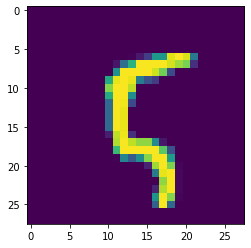

In [26]:
x = np.argmax(sess.run(hypothesis, feed_dict={X:val_x[100:101,:]}))
plt.imshow(val_x[100:101,:].reshape(28, 28)) # reshape 시키는 이유 : 그래야 그림이 보임
print(x)

#######################################

In [27]:
epochs = range(2000)
for epoch in epochs:
    sess.run(train, feed_dict = {X:train_x, Y:train_y})
    print("Epoch", epoch, " == ",sess.run(cost, feed_dict={X:val_x, Y:val_y}))

Epoch 0  ==  0.72166115
Epoch 1  ==  0.7215268
Epoch 2  ==  0.7213921
Epoch 3  ==  0.72125804
Epoch 4  ==  0.72112375
Epoch 5  ==  0.72099
Epoch 6  ==  0.72085583
Epoch 7  ==  0.7207219
Epoch 8  ==  0.7205882
Epoch 9  ==  0.7204545
Epoch 10  ==  0.7203211
Epoch 11  ==  0.72018754
Epoch 12  ==  0.72005403
Epoch 13  ==  0.71992075
Epoch 14  ==  0.71978754
Epoch 15  ==  0.7196543
Epoch 16  ==  0.71952116
Epoch 17  ==  0.7193883
Epoch 18  ==  0.71925575
Epoch 19  ==  0.719123
Epoch 20  ==  0.71899027
Epoch 21  ==  0.7188577
Epoch 22  ==  0.71872574
Epoch 23  ==  0.71859276
Epoch 24  ==  0.71846074
Epoch 25  ==  0.7183283
Epoch 26  ==  0.7181963
Epoch 27  ==  0.7180645
Epoch 28  ==  0.71793264
Epoch 29  ==  0.7178006
Epoch 30  ==  0.71766895
Epoch 31  ==  0.71753764
Epoch 32  ==  0.71740603
Epoch 33  ==  0.7172746
Epoch 34  ==  0.7171433
Epoch 35  ==  0.7170119
Epoch 36  ==  0.7168809
Epoch 37  ==  0.71674967
Epoch 38  ==  0.716619
Epoch 39  ==  0.7164883
Epoch 40  ==  0.7163574
Epoch 41  =

Epoch 330  ==  0.6819822
Epoch 331  ==  0.6818744
Epoch 332  ==  0.68176687
Epoch 333  ==  0.6816593
Epoch 334  ==  0.68155193
Epoch 335  ==  0.6814447
Epoch 336  ==  0.6813376
Epoch 337  ==  0.6812301
Epoch 338  ==  0.6811231
Epoch 339  ==  0.6810162
Epoch 340  ==  0.68090945
Epoch 341  ==  0.6808022
Epoch 342  ==  0.68069565
Epoch 343  ==  0.68058866
Epoch 344  ==  0.6804823
Epoch 345  ==  0.6803755
Epoch 346  ==  0.6802688
Epoch 347  ==  0.68016225
Epoch 348  ==  0.680056
Epoch 349  ==  0.6799495
Epoch 350  ==  0.67984295
Epoch 351  ==  0.6797368
Epoch 352  ==  0.67963076
Epoch 353  ==  0.67952454
Epoch 354  ==  0.6794185
Epoch 355  ==  0.67931235
Epoch 356  ==  0.6792068
Epoch 357  ==  0.67910075
Epoch 358  ==  0.67899483
Epoch 359  ==  0.6788893
Epoch 360  ==  0.67878354
Epoch 361  ==  0.6786779
Epoch 362  ==  0.6785726
Epoch 363  ==  0.6784671
Epoch 364  ==  0.6783617
Epoch 365  ==  0.6782563
Epoch 366  ==  0.67815125
Epoch 367  ==  0.67804587
Epoch 368  ==  0.6779407
Epoch 369  

Epoch 654  ==  0.65029997
Epoch 655  ==  0.65021116
Epoch 656  ==  0.65012205
Epoch 657  ==  0.6500336
Epoch 658  ==  0.6499445
Epoch 659  ==  0.649856
Epoch 660  ==  0.6497673
Epoch 661  ==  0.6496785
Epoch 662  ==  0.64959
Epoch 663  ==  0.64950126
Epoch 664  ==  0.6494128
Epoch 665  ==  0.6493245
Epoch 666  ==  0.64923614
Epoch 667  ==  0.64914787
Epoch 668  ==  0.6490596
Epoch 669  ==  0.64897126
Epoch 670  ==  0.6488832
Epoch 671  ==  0.6487949
Epoch 672  ==  0.64870703
Epoch 673  ==  0.6486188
Epoch 674  ==  0.6485309
Epoch 675  ==  0.64844304
Epoch 676  ==  0.64835477
Epoch 677  ==  0.6482672
Epoch 678  ==  0.6481793
Epoch 679  ==  0.6480918
Epoch 680  ==  0.64800376
Epoch 681  ==  0.6479163
Epoch 682  ==  0.6478285
Epoch 683  ==  0.6477411
Epoch 684  ==  0.64765334
Epoch 685  ==  0.64756614
Epoch 686  ==  0.6474786
Epoch 687  ==  0.6473912
Epoch 688  ==  0.6473038
Epoch 689  ==  0.6472165
Epoch 690  ==  0.6471291
Epoch 691  ==  0.6470422
Epoch 692  ==  0.64695513
Epoch 693  == 

Epoch 981  ==  0.6235969
Epoch 982  ==  0.6235218
Epoch 983  ==  0.623447
Epoch 984  ==  0.6233719
Epoch 985  ==  0.6232971
Epoch 986  ==  0.6232222
Epoch 987  ==  0.62314725
Epoch 988  ==  0.6230727
Epoch 989  ==  0.6229979
Epoch 990  ==  0.62292314
Epoch 991  ==  0.62284845
Epoch 992  ==  0.6227737
Epoch 993  ==  0.6226988
Epoch 994  ==  0.62262434
Epoch 995  ==  0.62254983
Epoch 996  ==  0.6224754
Epoch 997  ==  0.6224009
Epoch 998  ==  0.6223265
Epoch 999  ==  0.62225205
Epoch 1000  ==  0.6221774
Epoch 1001  ==  0.6221034
Epoch 1002  ==  0.6220292
Epoch 1003  ==  0.62195456
Epoch 1004  ==  0.6218806
Epoch 1005  ==  0.62180626
Epoch 1006  ==  0.6217323
Epoch 1007  ==  0.621658
Epoch 1008  ==  0.621584
Epoch 1009  ==  0.6215102
Epoch 1010  ==  0.62143594
Epoch 1011  ==  0.6213619
Epoch 1012  ==  0.621288
Epoch 1013  ==  0.6212141
Epoch 1014  ==  0.62114024
Epoch 1015  ==  0.6210663
Epoch 1016  ==  0.62099266
Epoch 1017  ==  0.62091887
Epoch 1018  ==  0.62084514
Epoch 1019  ==  0.6207

Epoch 1296  ==  0.6016413
Epoch 1297  ==  0.60157657
Epoch 1298  ==  0.60151166
Epoch 1299  ==  0.60144705
Epoch 1300  ==  0.60138226
Epoch 1301  ==  0.6013177
Epoch 1302  ==  0.6012532
Epoch 1303  ==  0.60118836
Epoch 1304  ==  0.601124
Epoch 1305  ==  0.60105956
Epoch 1306  ==  0.60099477
Epoch 1307  ==  0.6009305
Epoch 1308  ==  0.600866
Epoch 1309  ==  0.6008016
Epoch 1310  ==  0.6007371
Epoch 1311  ==  0.60067284
Epoch 1312  ==  0.60060847
Epoch 1313  ==  0.60054415
Epoch 1314  ==  0.6004799
Epoch 1315  ==  0.6004155
Epoch 1316  ==  0.60035145
Epoch 1317  ==  0.60028726
Epoch 1318  ==  0.60022277
Epoch 1319  ==  0.6001588
Epoch 1320  ==  0.6000948
Epoch 1321  ==  0.60003066
Epoch 1322  ==  0.5999666
Epoch 1323  ==  0.5999025
Epoch 1324  ==  0.5998385
Epoch 1325  ==  0.59977454
Epoch 1326  ==  0.5997107
Epoch 1327  ==  0.59964657
Epoch 1328  ==  0.5995829
Epoch 1329  ==  0.59951925
Epoch 1330  ==  0.5994553
Epoch 1331  ==  0.5993915
Epoch 1332  ==  0.59932774
Epoch 1333  ==  0.5992

Epoch 1608  ==  0.5827356
Epoch 1609  ==  0.58267885
Epoch 1610  ==  0.5826223
Epoch 1611  ==  0.58256537
Epoch 1612  ==  0.58250886
Epoch 1613  ==  0.5824522
Epoch 1614  ==  0.58239573
Epoch 1615  ==  0.5823393
Epoch 1616  ==  0.5822826
Epoch 1617  ==  0.58222604
Epoch 1618  ==  0.5821697
Epoch 1619  ==  0.5821132
Epoch 1620  ==  0.58205646
Epoch 1621  ==  0.5820004
Epoch 1622  ==  0.5819441
Epoch 1623  ==  0.5818877
Epoch 1624  ==  0.5818314
Epoch 1625  ==  0.581775
Epoch 1626  ==  0.58171874
Epoch 1627  ==  0.5816623
Epoch 1628  ==  0.58160603
Epoch 1629  ==  0.5815499
Epoch 1630  ==  0.5814936
Epoch 1631  ==  0.5814374
Epoch 1632  ==  0.5813813
Epoch 1633  ==  0.5813251
Epoch 1634  ==  0.58126885
Epoch 1635  ==  0.5812128
Epoch 1636  ==  0.58115673
Epoch 1637  ==  0.58110094
Epoch 1638  ==  0.58104485
Epoch 1639  ==  0.5809888
Epoch 1640  ==  0.5809329
Epoch 1641  ==  0.5808768
Epoch 1642  ==  0.58082116
Epoch 1643  ==  0.58076525
Epoch 1644  ==  0.58070916
Epoch 1645  ==  0.580653

Epoch 1920  ==  0.56610125
Epoch 1921  ==  0.56605136
Epoch 1922  ==  0.566001
Epoch 1923  ==  0.5659509
Epoch 1924  ==  0.56590104
Epoch 1925  ==  0.56585085
Epoch 1926  ==  0.5658007
Epoch 1927  ==  0.5657507
Epoch 1928  ==  0.56570065
Epoch 1929  ==  0.5656507
Epoch 1930  ==  0.56560063
Epoch 1931  ==  0.5655509
Epoch 1932  ==  0.56550086
Epoch 1933  ==  0.56545115
Epoch 1934  ==  0.5654012
Epoch 1935  ==  0.56535137
Epoch 1936  ==  0.5653015
Epoch 1937  ==  0.56525165
Epoch 1938  ==  0.5652019
Epoch 1939  ==  0.56515193
Epoch 1940  ==  0.56510216
Epoch 1941  ==  0.56505233
Epoch 1942  ==  0.56500256
Epoch 1943  ==  0.5649529
Epoch 1944  ==  0.56490314
Epoch 1945  ==  0.56485355
Epoch 1946  ==  0.56480384
Epoch 1947  ==  0.5647542
Epoch 1948  ==  0.5647047
Epoch 1949  ==  0.56465507
Epoch 1950  ==  0.5646055
Epoch 1951  ==  0.5645559
Epoch 1952  ==  0.5645064
Epoch 1953  ==  0.56445706
Epoch 1954  ==  0.56440765
Epoch 1955  ==  0.5643577
Epoch 1956  ==  0.5643083
Epoch 1957  ==  0.5

In [33]:
result = sess.run(hypothesis, feed_dict={X:test_x})
pred = np.apply_along_axis(np.argmax, 1, result)
real = np.apply_along_axis(np.argmax, 1, test_y)
test_acc = sum(pred == real)/real.size

In [35]:
result = sess.run(hypothesis, feed_dict={X:val_x})
pred = np.apply_along_axis(np.argmax, 1, result)
real = np.apply_along_axis(np.argmax, 1, val_y)
val_acc = sum(pred == real)/real.size

In [36]:
print("테스트 데이터의 정확도: ",test_acc, "검증 데이터의 정확도: ", val_acc)

테스트 데이터의 정확도:  0.8692 검증 데이터의 정확도:  0.8764
